<h1 style = "color : Green"> Lending Group Case Study </h2>

<h3 style = "color : Brown"> Group - Pradeep, Kaushal</h4>  

##### Study Details

###### 1. Background

Lending Club is the largest online peer-to-peer loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface.
Somepopular products are credit card loans, debt consolidation loans, house loans, car loans etc. Business Objective To identify variables which are strong indicators of default and potentially use the insights in approval / rejection decision making.

###### 2. Objective
To identify the risky loan applicants, so that such loans can be reduced thereby cutting down the amount of credit loss. 
The company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default. The company can utilise this knowledge for its portfolio and risk assessment.
<br>Identification of such applicants using EDA is the aim of this case study.

<h3 style="color:Black;">Libararies and Data Import for analysis</h3>

Importing required libraries:

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from scipy.stats import norm
import seaborn as sns
import datetime

Reading the loan dataset to a pandas dataframe:

In [3]:
loan = pd.read_csv("C:/Users/King of Kings/Downloads/Upgrad Practice/LendingGroupCaseStudy/loan.csv", low_memory=False)
loan_data_dictionary = pd.read_excel("C:/Users/King of Kings/Downloads/Upgrad Practice/LendingGroupCaseStudy/Data_Dictionary.xlsx")

**High level data review:**<br>
*Total rows in the loan dataset file : 39717 <br>*
*Total columns in the loan dataset file : 111*

In [4]:
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 1000)
print(loan.shape)
print(loan.info())
print(loan.dtypes)
loan.describe()

(39717, 111)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None
id                                  int64
member_id                           int64
loan_amnt                           int64
funded_amnt                         int64
funded_amnt_inv                   float64
term                               object
int_rate                           object
installment                       float64
grade                              object
sub_grade                          object
emp_title                          object
emp_length                         object
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                            object
loan_status                        object
pymnt_plan                         object
url                          

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,0.0,39717.0,0.0,0.0,0.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39661.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

**Data dictionary vs Data comparison**
*Observations:*
We have 111 fields in loan file, whereas in data dictionary we have 115 fields
Fields missing from the loan file:
fico_range_high
fico_range_low
last_fico_range_high
last_fico_range_low

Fields with name mismatch:
verification_status_joint is given as verified_status_joint in data dictionary

In [5]:
loan_column_list = loan.columns.tolist()
dictionary_column_list = loan_data_dictionary.LoanStatNew.dropna().tolist()
diff_1 = [item for item in loan_column_list if item not in dictionary_column_list]
diff_2 = [item for item in dictionary_column_list if item not in loan_column_list]

print(f"Number of columns in loan dataset:",len(loan_column_list))
print(f"Number of columns in loan data dictionary", len(dictionary_column_list))

print(f"Data dictionary vs loan file comparison:",len(diff_2),"fields have issues:", diff_2)
print(f"Loan file vs data dictionary comparison",len(diff_1),"fields have issues:", diff_1)


Number of columns in loan dataset: 111
Number of columns in loan data dictionary 115
Data dictionary vs loan file comparison: 6 fields have issues: ['fico_range_high', 'fico_range_low', 'last_fico_range_high', 'last_fico_range_low', 'total_rev_hi_lim \xa0', 'verified_status_joint']
Loan file vs data dictionary comparison 2 fields have issues: ['verification_status_joint', 'total_rev_hi_lim']


**Null analysis**
*There are 0 rows with null values
There are 54 columns with null/missing values

In [6]:

row_nulls = loan.isnull().all(axis=1).sum()
print('Count of empty Rows:', row_nulls)


null_columns = loan.isnull().all(axis=0).sum()
print('Count of Columns with missing values:  ', null_columns)


Count of empty Rows: 0
Count of Columns with missing values:   54


<h3 style="color:Black;">Data cleaning and manipulation</h3>

**Drop the fields which are null

In [7]:
loan = loan.dropna(axis=1, how='all')

print("data shape is {}".format(loan.shape))
loan.describe()

data shape is (39717, 57)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,39717.0,39717.0,39661.0,39717.0,39020.000000,39678.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,1.0,0.0,0.0,0.0,0.043260,0.0
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,0.0,0.0,0.0,0.0,0.204324,0.0
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,34.000000,90.000000,9.000000,0.000000,8850.000000,20.000000,0.000000,0.000000,9899.640319,9287.150000,8000.000000,1348.910000,0.000000,0.000000,0.000000,546.140000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,52.000000,104.000000,12.000000,0.000000,17058.000000,29.000000,0.000000,0.000000,16534.433040,15798.810000,13653.260000,2833.400000,0.000000,0.000000,0.000000,3293.160000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,120.000000,129.000000,44.000000,4.000000,149588.000000,90.000000,6311.470000,6307.370000,58563.679930,58563.680000,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,36115.200000,0.0,1.0,0.0,0.0,0.0,2.000000,0.0


**Dropping fields based on statistical (mean/avg/min/max) analysis**               


In [8]:
#check for variables with nulls

avg_nulls = loan.isnull().mean() * 100
print(avg_nulls)

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.580507
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


*Based on the above analysis, the fields - mths_since_last_delinq, mths_since_last_record  & next_pymnt_d have more than 50 percent of nulls. Hence we can drop them, since may not find any meaningful insights.  

In [9]:
loan = loan.drop(["mths_since_last_delinq", "mths_since_last_record", "next_pymnt_d"], axis=1)
print("data shape is {}".format(loan.shape))
loan.describe()

data shape is (39717, 54)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,39717.0,39717.0,39661.0,39717.0,39020.000000,39678.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,1.0,0.0,0.0,0.0,0.043260,0.0
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,0.0,0.0,0.0,0.0,0.204324,0.0
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,9.000000,0.000000,8850.000000,20.000000,0.000000,0.000000,9899.640319,9287.150000,8000.000000,1348.910000,0.000000,0.000000,0.000000,546.140000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,12.000000,0.000000,17058.000000,29.000000,0.000000,0.000000,16534.433040,15798.810000,13653.260000,2833.400000,0.000000,0.000000,0.000000,3293.160000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,44.000000,4.000000,149588.000000,90.000000,6311.470000,6307.370000,58563.679930,58563.680000,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,36115.200000,0.0,1.0,0.0,0.0,0.0,2.000000,0.0


**dropping additional fields where mean,min, max are zeros or same as they unlikely to provide meaningful insights
columns_to_drop = ["collections_12_mths_ex_med","policy_code","acc_now_delinq", "chargeoff_within_12_mths", "delinq_amnt","tax_liens"]

In [10]:
columns_to_drop = ["collections_12_mths_ex_med","policy_code","acc_now_delinq", "chargeoff_within_12_mths", "delinq_amnt","tax_liens"]
loan.drop(labels = columns_to_drop, axis =1, inplace=True)
print("data shape is {}".format(loan.shape))
loan.describe()

data shape is (39717, 48)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39020.000000
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.043260
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.204324
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.000000
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,9.000000,0.000000,8850.000000,20.000000,0.000000,0.000000,9899.640319,9287.150000,8000.000000,1348.910000,0.000000,0.000000,0.000000,546.140000,0.000000
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,12.000000,0.000000,17058.000000,29.000000,0.000000,0.000000,16534.433040,15798.810000,13653.260000,2833.400000,0.000000,0.000000,0.000000,3293.160000,0.000000
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,44.000000,4.000000,149588.000000,90.000000,6311.470000,6307.370000,58563.679930,58563.680000,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,36115.200000,2.000000


In [11]:
#Dropping other fields which are not useful

columns_to_drop = ["url","desc"]
loan.drop(labels = columns_to_drop, axis =1, inplace=True)
print("data shape is {}".format(loan.shape))

data shape is (39717, 46)


In [12]:
value_counts = loan['id'].value_counts()
duplicate_count = (value_counts > 1).sum()
print("Number of unique values in the 'id' column:", len(value_counts))
print("Number of duplicates in the 'id' column:", duplicate_count)

value_counts = loan['member_id'].value_counts()
duplicate_count = (value_counts > 1).sum()
print("Number of unique values in the 'member_id' column:", len(value_counts))
print("Number of duplicates in the 'member_id' column:", duplicate_count)

Number of unique values in the 'id' column: 39717
Number of duplicates in the 'id' column: 0
Number of unique values in the 'member_id' column: 39717
Number of duplicates in the 'member_id' column: 0


**Data casting

In [13]:
loan.head(2)
#data analysis:

#Interest rate,revol_util - % symbol should be removed and it can be converted to float
# issue_d, last_pymnt_d, last_credit_pull_d, earliest_cr_line - Dates are in MMM-YY format, should be converted to proper date format.
#pub_rec_bankruptcies - Replace null with unknown

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,application_type,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.0,0.00,0.00,Jan-15,171.62,May-16,INDIVIDUAL,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-13,119.66,Sep-13,INDIVIDUAL,0.0


In [15]:
loan['int_rate'] = loan['int_rate'].astype(str).str.rstrip('%').astype(float)
loan['revol_util'] = loan['revol_util'].astype(str).str.rstrip('%').astype(float)
loan['issue_d'] = pd.to_datetime(loan['issue_d'], format ='%b-%y')
loan['last_pymnt_d'] = pd.to_datetime(loan['last_pymnt_d'], format ='%b-%y')
loan['last_credit_pull_d'] = pd.to_datetime(loan['last_credit_pull_d'], format ='%b-%y')
loan['earliest_cr_line'] = pd.to_datetime(loan['earliest_cr_line'], format ='%b-%y')
loan.pub_rec_bankruptcies.fillna('unknown',inplace=True)
print("data shape is {}".format(loan.shape))
loan.info()


data shape is (39717, 46)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 46 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       39717 non-null  int64         
 1   member_id                39717 non-null  int64         
 2   loan_amnt                39717 non-null  int64         
 3   funded_amnt              39717 non-null  int64         
 4   funded_amnt_inv          39717 non-null  float64       
 5   term                     39717 non-null  object        
 6   int_rate                 39717 non-null  float64       
 7   installment              39717 non-null  float64       
 8   grade                    39717 non-null  object        
 9   sub_grade                39717 non-null  object        
 10  emp_title                37258 non-null  object        
 11  emp_length               38642 non-null  object        
 12  home_o

In [16]:

#checking min and max for all the date variables

loan[['earliest_cr_line','last_credit_pull_d','last_pymnt_d','issue_d']].agg(['min','mean','max'])

# observation: earliest_cr_line has a future date , logic needs to be reviewed

,earliest_cr_line,last_credit_pull_d,last_pymnt_d,issue_d
min,1969-02-01 00:00:00.000000000,2007-05-01 00:00:00.000000000,2008-01-01 00:00:00.000000000,2007-06-01 00:00:00.000000000
mean,1997-04-11 16:09:21.250849664,2014-09-07 19:16:08.007050496,2013-04-10 05:32:22.652474368,2010-11-03 23:26:45.166553344
max,2068-12-01 00:00:00.000000000,2016-05-01 00:00:00.000000000,2016-05-01 00:00:00.000000000,2011-12-01 00:00:00.000000000


In [17]:
#to handle future dats (subtracting 100 years)
def date_correction(date):
    if date > pd.to_datetime('2017-01-01'):
        return date - pd.DateOffset(years=100)
    else:
        return date

#correcting earliest_cr_line as it has unrealistic dates due to a datetime limitation  
loan['earliest_cr_line_corrected'] = loan['earliest_cr_line'].apply(date_correction) 
loan[['earliest_cr_line','last_credit_pull_d','last_pymnt_d','issue_d','earliest_cr_line_corrected']].agg(['min','mean','max'])


,earliest_cr_line,last_credit_pull_d,last_pymnt_d,issue_d,earliest_cr_line_corrected
min,1969-02-01 00:00:00.000000000,2007-05-01 00:00:00.000000000,2008-01-01 00:00:00.000000000,2007-06-01 00:00:00.000000000,1946-01-01 00:00:00.000000000
mean,1997-04-11 16:09:21.250849664,2014-09-07 19:16:08.007050496,2013-04-10 05:32:22.652474368,2010-11-03 23:26:45.166553344,1997-01-18 21:45:07.545887104
max,2068-12-01 00:00:00.000000000,2016-05-01 00:00:00.000000000,2016-05-01 00:00:00.000000000,2011-12-01 00:00:00.000000000,2008-11-01 00:00:00.000000000


### Univariate Analysis

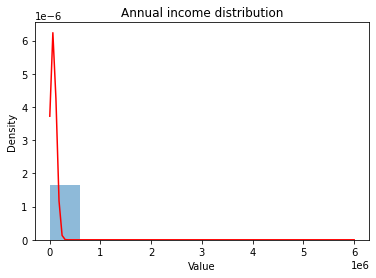

count    3.971700e+04
mean     6.896893e+04
std      6.379377e+04
min      4.000000e+03
25%      4.040400e+04
50%      5.900000e+04
75%      8.230000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [19]:
#checking annual income
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Create subplots
fig, ax = plt.subplots()

# Plot histogram
ax.hist(loan['annual_inc'], bins=10, density=True, alpha=0.5)

# Calculate mean and standard deviation
mean = loan['annual_inc'].mean()
std_dev = loan['annual_inc'].std()

# Create an array of values for the x-axis
x_axis = np.linspace(loan['annual_inc'].min(), loan['annual_inc'].max(), 100)

# Generate a normal distribution curve (PDF) using mean and standard deviation
curve = norm.pdf(x_axis, mean, std_dev)

# Plot the PDF curve
ax.plot(x_axis, curve, color='red')

# Set plot labels and title
ax.set_xlabel('Value')
ax.set_ylabel('Density')
ax.set_title('Annual income distribution')

# Show the plot
plt.show()

# Display descriptive statistics for the 'annual_inc' column
loan['annual_inc'].describe()



#observation: annual income is skewed. 

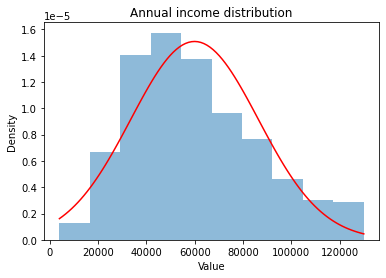

Q1: 40000.0, Q3: 76000.0, IQR: 36000.0,
Median: 55400, Mean: 59946,
Lower bound: -14000.0, Upper bound: 130000.0


In [110]:
#removing the outliers using Interquartile ranges  as data is skewed

# calculate the first quartile (Q1)
Q1 = loan['annual_inc'].quantile(0.25)
Median = loan['annual_inc'].quantile(0.5)
Average = loan['annual_inc'].mean()

# calculate the third quartile (Q3)
Q3 = loan['annual_inc'].quantile(0.75)

# calculate the interquartile range (IQR)
IQR = Q3 - Q1

# determine the lower bound
lower_bound = Q1 - (1.5 * IQR)

# determine the upper bound
upper_bound = Q3 + (1.5 * IQR)


# remove outliers from DataFrame
loan = loan[(loan['annual_inc'] >= lower_bound) & (loan['annual_inc'] <= upper_bound)]



#checking annual income
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Create subplots
fig, ax = plt.subplots()

# Plot histogram
ax.hist(loan['annual_inc'], bins=10, density=True, alpha=0.5)

# Calculate mean and standard deviation
mean = loan['annual_inc'].mean()
std_dev = loan['annual_inc'].std()

# Create an array of values for the x-axis
x_axis = np.linspace(loan['annual_inc'].min(), loan['annual_inc'].max(), 100)

# Generate a normal distribution curve (PDF) using mean and standard deviation
curve = norm.pdf(x_axis, mean, std_dev)

# Plot the PDF curve
ax.plot(x_axis, curve, color='red')

# Set plot labels and title
ax.set_xlabel('Value')
ax.set_ylabel('Density')
ax.set_title('Annual income distribution')

# Show the plot
plt.show()

# Display descriptive statistics for the 'annual_inc' column
loan['annual_inc'].describe()

print("Q1: {0}, Q3: {1}, IQR: {2},\nMedian: {5}, Mean: {6},\nLower bound: {3}, Upper bound: {4}".format(Q1, Q3, IQR, lower_bound, upper_bound, round(Median), round(Average)))


#observation: skew is fixed

percentage of loan status: 0    82.80498
1    14.40940
2     2.78562
Name: loan_status_num, dtype: float64
loan_status_counts: 0    0.828050
1    0.144094
2    0.027856
Name: loan_status_num, dtype: float64


C:\Users\KINGOF~1\AppData\Local\Temp/ipykernel_30320/2389575446.py:21: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(s = "{}%".format(round(xy[1]*100)), xy = xy,  textcoords='data')


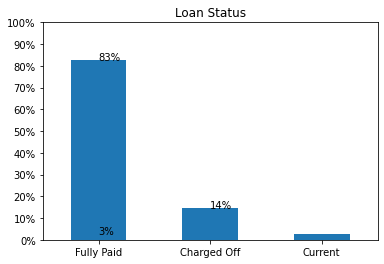

0    30796
1     5359
2     1036
Name: loan_status_num, dtype: int64

In [113]:
# Based on the data dictionary and assignment objective, loan_status is the key variable to perform the analysis
# derived a new variable to represent the loan_status in numeric format; 
# loan_status_num:  fully paid = 0 , Charged off = 1 and current = 2

loan["loan_status_num"] = [1 if x=="Charged Off" else 2 if x=="Current" else 0 for x in loan['loan_status']]
loan["loan_status_num_1"] = [1 if x=="Charged Off" else 0 if x=="Current" else 0 for x in loan['loan_status']]
print("percentage of loan status:", loan.loan_status_num.value_counts(normalize=True)*100)
print("loan_status_counts:",count)

count = loan['loan_status_num'].value_counts()/len(loan['loan_status_num'])
labels_x = ['Fully Paid', 'Charged Off', 'Current']

count.plot(kind='bar', title = 'Loan Status')

ticks = np.arange(0, 1.1, 0.1)
labels = ["{}%".format(round(i*100)) for i in ticks]
plt.yticks(ticks, labels)

plt.xticks((0,1,2),labels_x,rotation = 0)
for xy in zip(loan["loan_status_num"], count):
    plt.annotate(s = "{}%".format(round(xy[1]*100)), xy = xy,  textcoords='data')

plt.show()
loan['loan_status_num'].value_counts()
#observation loan status Fully Paid: 83%, charged off - 14%, current - 3%


In [26]:
#derive new variables extracted from date fields
loan['issue_yr'] = loan['issue_d'].dt.year
loan['issue_month'] = loan['issue_d'].dt.month

loan['earliest_cr_line_yr'] = loan['earliest_cr_line_corrected'].dt.year
loan['earliest_cr_line_month'] = loan['earliest_cr_line_corrected'].dt.month

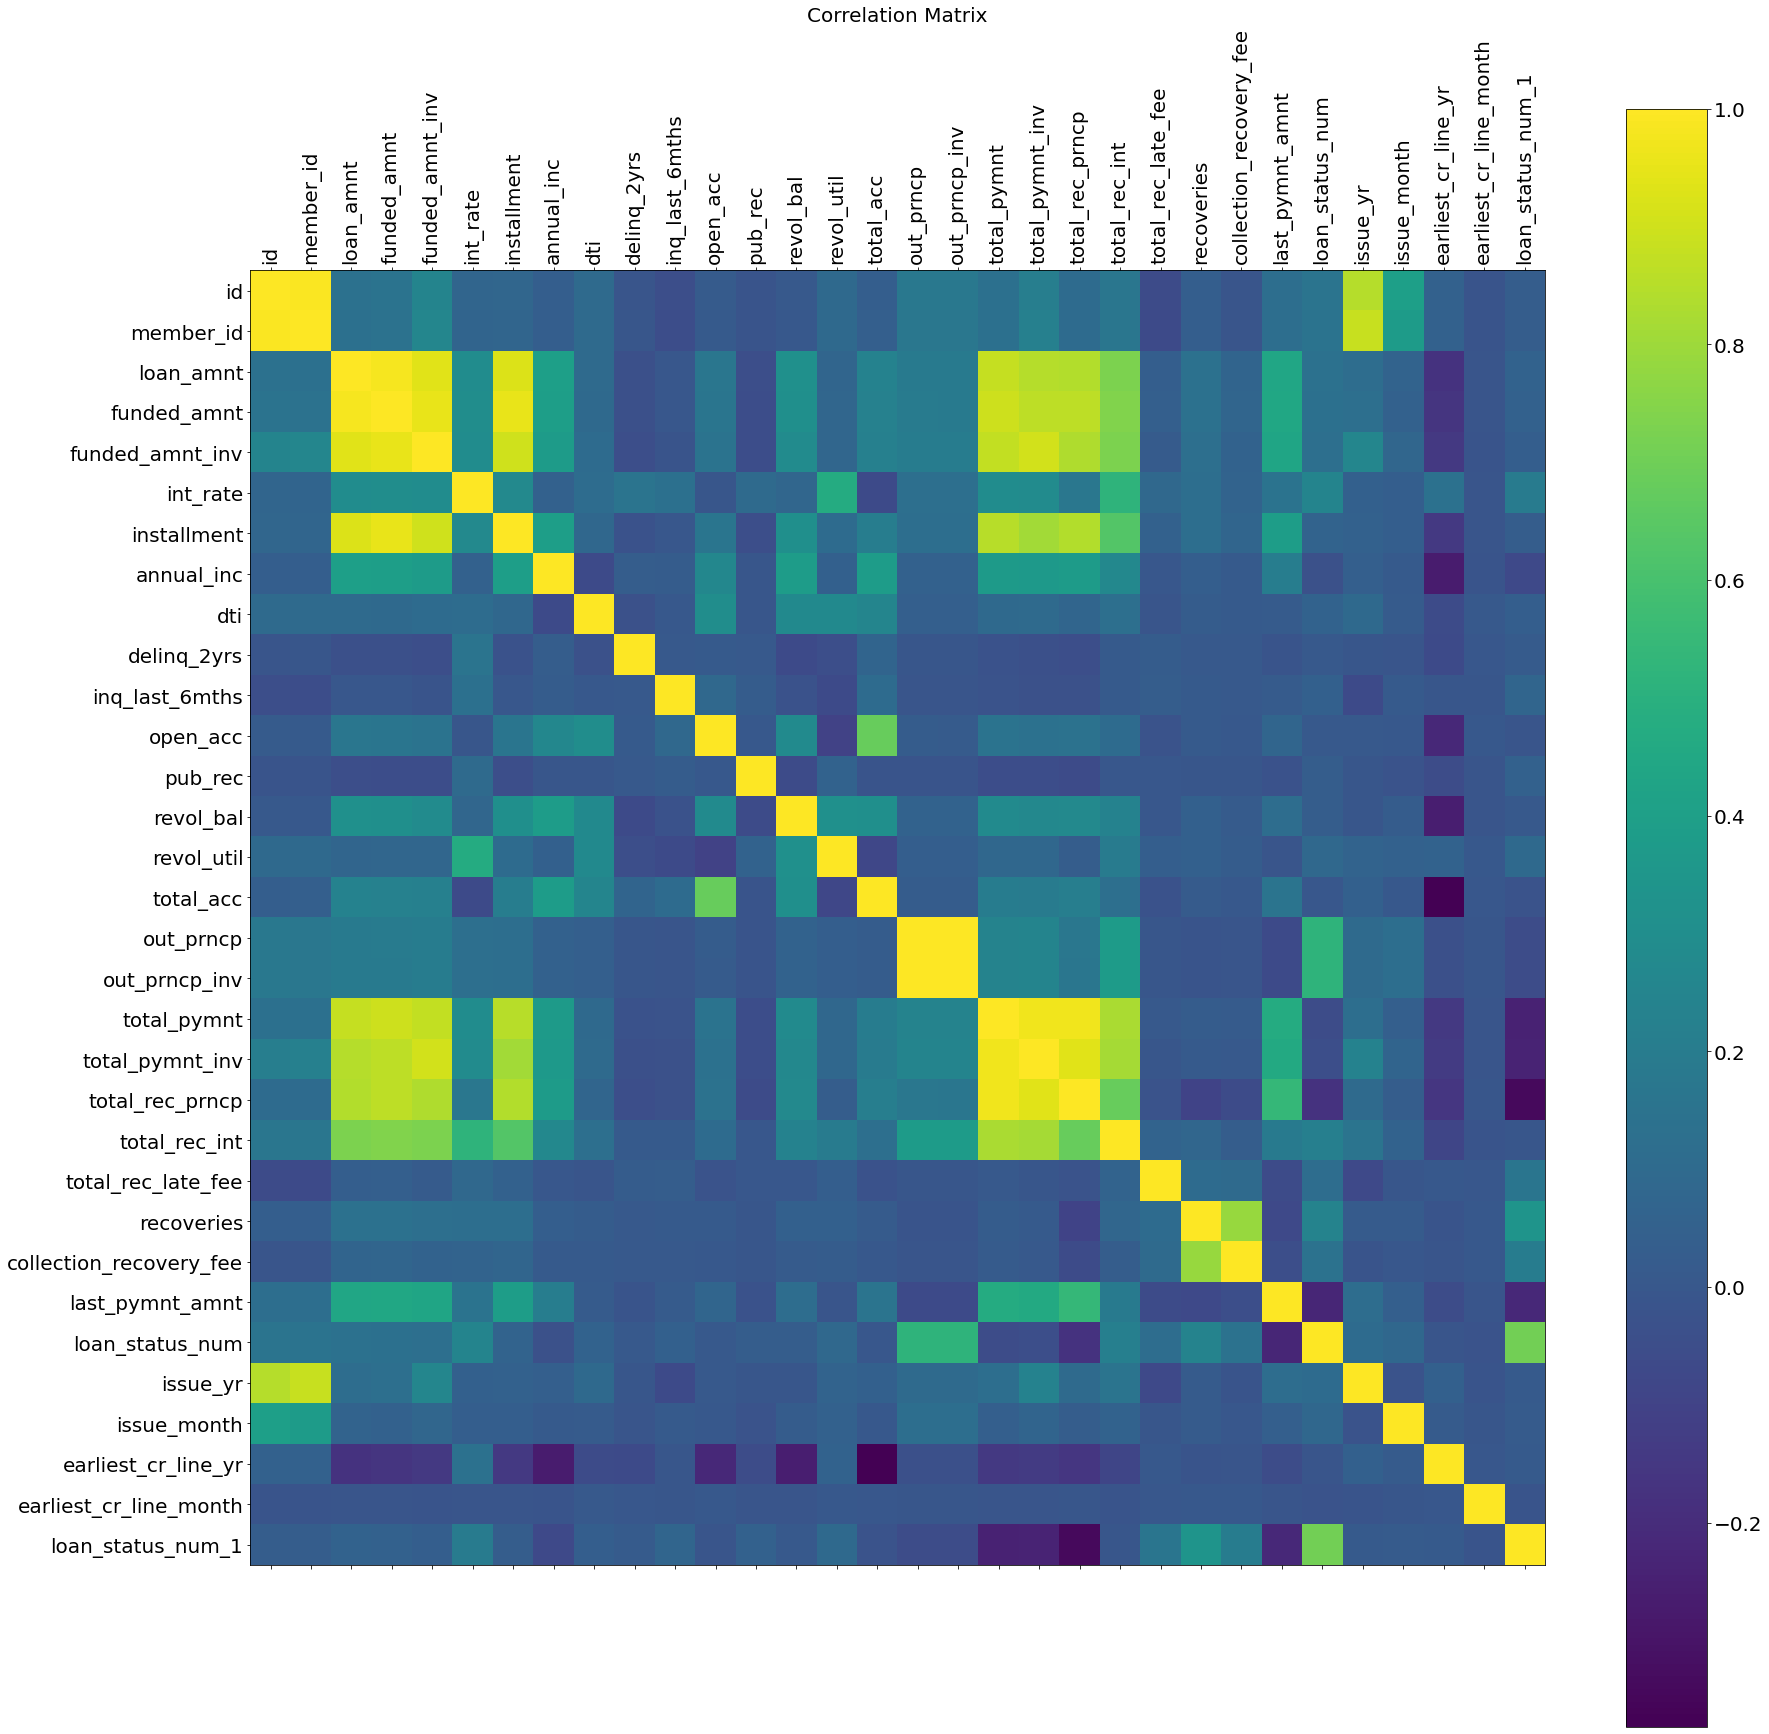

In [65]:
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_columns = loan.select_dtypes(include=['number'])

# Create a correlation matrix
corr_matrix = numeric_columns.corr()

# Plot the correlation matrix
f = plt.figure(figsize=(29, 29))
plt.matshow(corr_matrix, fignum=f.number)
plt.xticks(range(numeric_columns.shape[1]), numeric_columns.columns, fontsize=20, rotation=90)
plt.yticks(range(numeric_columns.shape[1]), numeric_columns.columns, fontsize=20)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=20)
plt.title('Correlation Matrix', fontsize=20)
plt.show()

#observation - loan_amnt, funded_amnt and funded_amnt_inv are positively correlated. few variables are negatively correlated. 


In [66]:
### Get correlation matrix to compare the correlation efficient  
loan_corr=loan.select_dtypes(['number']).corr()
loan_corr

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,loan_status_num,issue_yr,issue_month,earliest_cr_line_yr,earliest_cr_line_month,loan_status_num_1
id,1.000000,0.993786,0.136757,0.147406,0.246438,0.073494,0.081926,0.038258,0.099175,-0.008678,-0.044344,0.019606,-0.017004,0.011378,0.095425,0.038678,0.178461,0.178434,0.132235,0.214862,0.104531,0.165833,-0.061299,0.037492,-0.009984,0.121702,0.154696,0.845857,0.403574,0.054736,-0.018874,0.032047
member_id,0.993786,1.000000,0.135678,0.145548,0.255158,0.069398,0.076304,0.039323,0.099847,-0.008363,-0.049032,0.017263,-0.016144,0.007474,0.093578,0.040950,0.168966,0.168930,0.132304,0.223756,0.104612,0.166392,-0.063981,0.035516,-0.011965,0.123042,0.148252,0.882272,0.380014,0.055753,-0.018538,0.030064
loan_amnt,0.136757,0.135678,1.000000,0.981798,0.938630,0.296673,0.929454,0.399681,0.099166,-0.038362,-0.001004,0.164549,-0.045202,0.317304,0.073026,0.237344,0.193299,0.192933,0.879965,0.846397,0.843190,0.728784,0.039399,0.138512,0.071803,0.440717,0.138142,0.118098,0.065112,-0.169694,-0.013664,0.057653
funded_amnt,0.147406,0.145548,0.981798,1.000000,0.956685,0.301378,0.955099,0.395350,0.098290,-0.038482,-0.000368,0.162476,-0.046463,0.309693,0.077392,0.231697,0.195373,0.195057,0.896499,0.862894,0.861041,0.737173,0.041704,0.140432,0.073867,0.445643,0.135254,0.128750,0.055843,-0.162910,-0.013535,0.055134
funded_amnt_inv,0.246438,0.255158,0.938630,0.956685,1.000000,0.295492,0.901544,0.378390,0.105695,-0.044435,-0.014807,0.150364,-0.048172,0.289896,0.081921,0.224225,0.204189,0.204192,0.874002,0.907290,0.836414,0.729533,0.021485,0.127379,0.059051,0.436565,0.127704,0.259181,0.082613,-0.147484,-0.013968,0.035480
int_rate,0.073494,0.069398,0.296673,0.301378,0.295492,1.000000,0.272779,0.054829,0.112563,0.152539,0.132656,-0.007826,0.102796,0.081567,0.470502,-0.065474,0.128176,0.128234,0.293534,0.289035,0.171813,0.521349,0.088842,0.122986,0.066164,0.147309,0.245145,0.050480,0.039218,0.139616,-0.009996,0.199257
installment,0.081926,0.076304,0.929454,0.955099,0.901544,0.272779,1.000000,0.395129,0.085851,-0.025674,0.000046,0.158881,-0.041048,0.309142,0.105362,0.210434,0.124364,0.124177,0.850702,0.809211,0.842262,0.633865,0.050983,0.121133,0.073150,0.392203,0.063891,0.053799,0.036369,-0.143346,-0.008974,0.030902
annual_inc,0.038258,0.039323,0.399681,0.395350,0.378390,0.054829,0.395129,1.000000,-0.067284,0.030173,0.028255,0.264285,-0.007048,0.387718,0.045595,0.383733,0.055895,0.055575,0.376011,0.361735,0.378924,0.266570,0.001535,0.036775,0.014803,0.209591,-0.029945,0.040802,0.018241,-0.268734,-0.017371,-0.068000
dti,0.099175,0.099847,0.099166,0.098290,0.105695,0.112563,0.085851,-0.067284,1.000000,-0.031951,0.007332,0.300211,-0.007607,0.277797,0.275909,0.249283,0.043001,0.042934,0.096310,0.102040,0.073296,0.128343,-0.010825,0.027637,0.013703,0.023157,0.057675,0.096532,0.021396,-0.057575,0.009486,0.037383
delinq_2yrs,-0.008678,-0.008363,-0.038362,-0.038482,-0.044435,0.152539,-0.025674,0.030173,-0.031951,1.000000,0.008967,0.014459,0.008131,-0.062679,-0.042965,0.067543,-0.006229,-0.006461,-0.029549,-0.035828,-0.044060,0.014308,0.028999,0.010851,0.011429,-0.015728,0.011514,-0.003224,-0.012697,-0.064131,-0.002049,0.019086


In [57]:
#Generic function to generate box plot out of a given variables  
def box_plt(df,x_col,y_col,plot_title):
    palette = sns.color_palette(['#d2b48c', '#800080', '#90ee90'])
    colors = ['#d2b48c', '#800080', '#90ee90']
    labels = ['Fully Paid', 'Charged Off', 'Current']
    legend_dict = dict(zip(labels, colors))
    legend_handles = [plt.Rectangle((0,0), 1, 1, color=color, label=label) for label, color in legend_dict.items()]
    sns.boxplot(x=x_col, y=y_col, data=df, palette=palette)
    plt.legend(handles=legend_handles, bbox_to_anchor=(1.05, 0.5), loc='center left')
    plt.xticks((0,1,2),labels)
    plt.xlabel('Loan Status')
    plt.title(plot_title)
    plt.show()

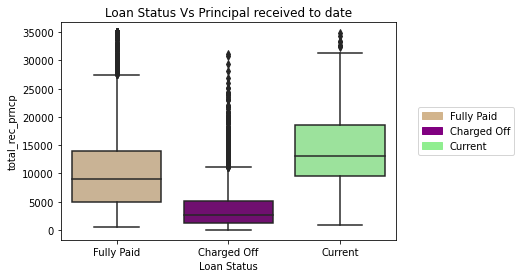

In [115]:

x_col = 'loan_status_num'
y_col = 'total_rec_prncp'

box_plt(df=loan,x_col=x_col,y_col=y_col, plot_title="Loan Status Vs Principal received to date")

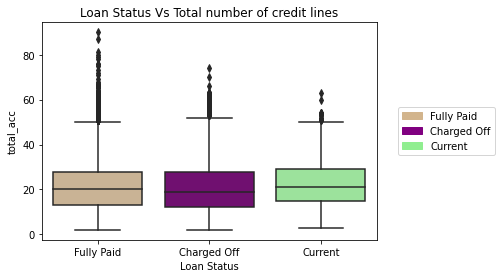

In [119]:
x_col = 'loan_status_num'
y_col = 'total_acc'


box_plt(df=loan,x_col=x_col,y_col=y_col, plot_title="Loan Status Vs Total number of credit lines")

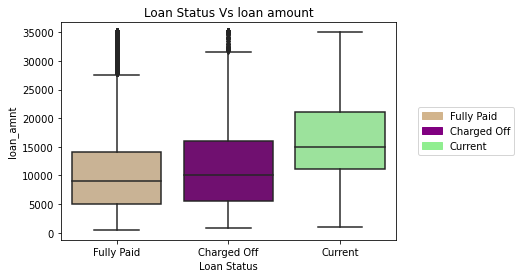

In [117]:
x_col = 'loan_status_num'
y_col = 'loan_amnt'

box_plt(df=loan,x_col=x_col,y_col=y_col, plot_title="Loan Status Vs loan amount")

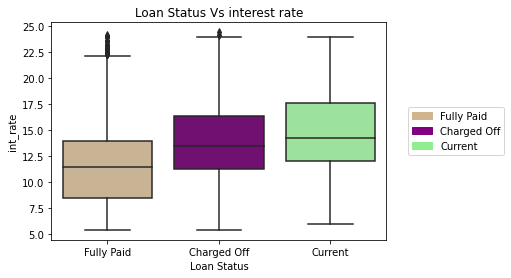

In [118]:
x_col = 'loan_status_num'
y_col = 'int_rate'

box_plt(df=loan,x_col=x_col,y_col=y_col, plot_title="Loan Status Vs interest rate")

<h3 style="color:Black;">Bivariate analysis</h3>

In [165]:
def bivariate_box(df, loan_status_comparison,plot_title,width=20,height=5,rot=0):
    # Create a pivot table with a given field and loan_status
    col_vs_loan_status_df = df.groupby([loan_status_comparison, 'loan_status']).size().unstack(fill_value=0).reset_index()
    col_vs_loan_status_df['Total'] = col_vs_loan_status_df['Charged Off'] + col_vs_loan_status_df['Current'] + col_vs_loan_status_df['Fully Paid']
    col_vs_loan_status_df['Chargedoff_percent'] = col_vs_loan_status_df['Charged Off'] / col_vs_loan_status_df['Total']
    col_vs_loan_status_df.columns.set_names(['row_id'], inplace=True)

    # Barplot generation based on the pivot
    plt.figure(figsize=(width, height))
    sns.barplot(y='Chargedoff_percent', x=loan_status_comparison, data=col_vs_loan_status_df, palette='viridis')
    plt.title('{} vs Charged off'.format(loan_status_comparison), fontsize=20, color='b')
    plt.xlabel(loan_status_comparison, fontsize=12, color='b')
    plt.ylabel('Chargedoff ratio', fontsize=12, color='b')
    plt.title(plot_title)
    plt.xticks(rotation=rot)
    plt.show()

    return col_vs_loan_status_df.sort_values('Chargedoff_percent', ascending=False)

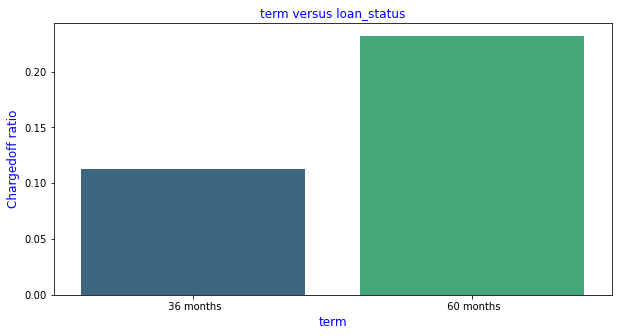

row_id,term,Charged Off,Current,Fully Paid,Total,Chargedoff_percent
1,60 months,2276,1036,6501,9813,0.231937
0,36 months,3083,0,24295,27378,0.112609


In [155]:

loan_status_comparison='term'
bivariate_box(df=loan,loan_status_comparison=loan_status_comparison,plot_title='term versus loan_status',width = 10,height = 5,rot = 0)

#observation : customers who took 60 month term loan defaulted twice than who did 36 months term

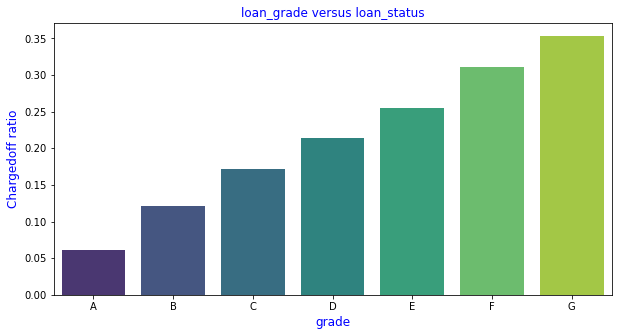

row_id,grade,Charged Off,Current,Fully Paid,Total,Chargedoff_percent
6,G,94,14,158,266,0.353383
5,F,287,57,578,922,0.311280
4,E,648,154,1743,2545,0.254617
3,D,1066,204,3701,4971,0.214444
2,C,1312,245,6076,7633,0.171885
1,B,1366,323,9599,11288,0.121013
0,A,586,39,8941,9566,0.061259


In [156]:

loan_status_comparison='grade'
bivariate_box(df=loan,loan_status_comparison=loan_status_comparison,plot_title='loan_grade versus loan_status' ,width = 10,height = 5,rot = 0)

#observation : linear increase is observed

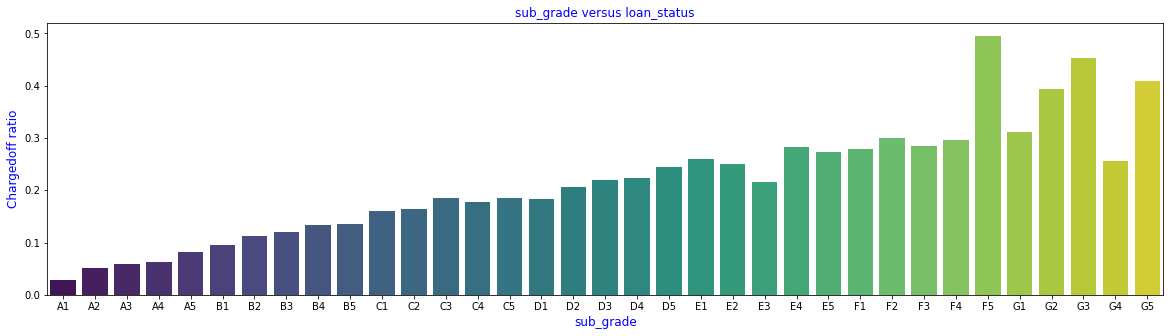

row_id,sub_grade,Charged Off,Current,Fully Paid,Total,Chargedoff_percent
29,F5,50,3,48,101,0.495050
32,G3,19,3,20,42,0.452381
34,G5,9,0,13,22,0.409091
31,G2,26,1,39,66,0.393939
30,G1,29,9,55,93,0.311828
26,F2,66,13,141,220,0.300000
28,F4,45,14,93,152,0.296053
27,F3,46,9,107,162,0.283951
23,E4,115,24,269,408,0.281863
25,F1,80,18,189,287,0.278746


In [157]:

loan_status_comparison='sub_grade'
bivariate_box(df=loan,loan_status_comparison=loan_status_comparison,plot_title='sub_grade versus loan_status' ,width = 20,height = 5,rot = 0)

#observation : linear increase is observed similar to grade. F5 has the highest chargeoff Ratio.

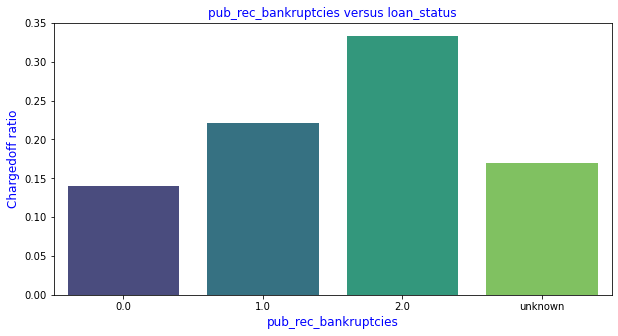

row_id,pub_rec_bankruptcies,Charged Off,Current,Fully Paid,Total,Chargedoff_percent
2,2.0,2,1,3,6,0.333333
1,1.0,358,35,1229,1622,0.220715
3,unknown,111,0,542,653,0.169985
0,0.0,4888,1000,29022,34910,0.140017


In [158]:
loan_status_comparison='pub_rec_bankruptcies'

bivariate_box(df=loan,loan_status_comparison=loan_status_comparison,plot_title='pub_rec_bankruptcies versus loan_status' ,width = 10,height = 5,rot = 0)


# observation: customers who have more public record bankruptcies are likely to default

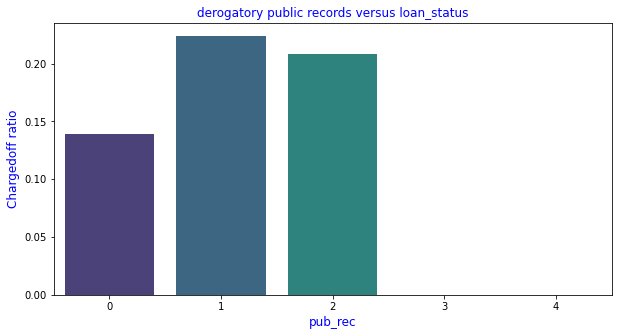

row_id,pub_rec,Charged Off,Current,Fully Paid,Total,Chargedoff_percent
1,1,446,41,1504,1991,0.224008
2,2,10,2,36,48,0.208333
0,0,4903,993,29248,35144,0.139512
3,3,0,0,6,6,0.000000
4,4,0,0,2,2,0.000000


In [159]:

loan_status_comparison='pub_rec'
bivariate_box(df=loan,loan_status_comparison=loan_status_comparison,plot_title='derogatory public records versus loan_status' ,width = 10,height = 5,rot = 0)

# observation: cutomers with derogatory public records are likely to default

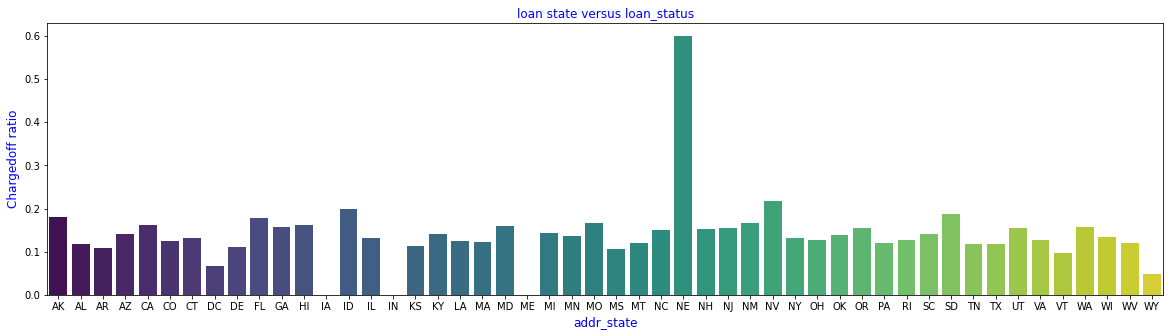

row_id,addr_state,Charged Off,Current,Fully Paid,Total,Chargedoff_percent
28,NE,3,0,2,5,0.600000
32,NV,101,16,350,467,0.216274
13,ID,1,0,4,5,0.200000
40,SD,12,2,50,64,0.187500
0,AK,13,1,58,72,0.180556
9,FL,482,80,2147,2709,0.177925
24,MO,110,15,534,659,0.166920
31,NM,30,5,146,181,0.165746
11,HI,27,7,132,166,0.162651
4,CA,1060,130,5392,6582,0.161045


In [160]:

loan_status_comparison='addr_state'
bivariate_box(df=loan,loan_status_comparison=loan_status_comparison,plot_title='loan state versus loan_status' ,width = 20,height = 5,rot = 0)


# observation: cusotmers from NV , close 22 % have defaulted(with more count), customers from NE have around 60% defauters (but the count is less) 

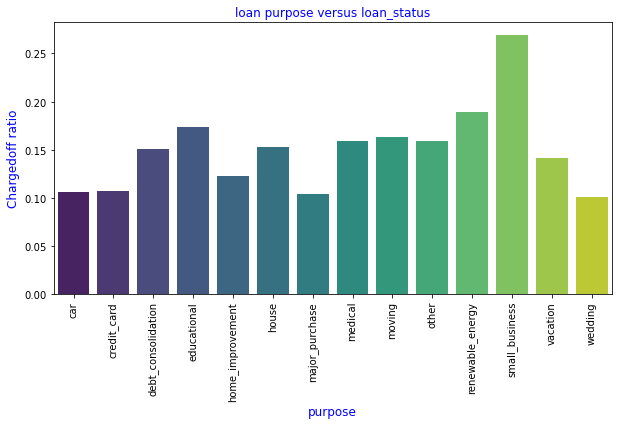

row_id,purpose,Charged Off,Current,Fully Paid,Total,Chargedoff_percent
11,small_business,447,70,1145,1662,0.268953
10,renewable_energy,18,1,76,95,0.189474
3,educational,54,0,257,311,0.173633
8,moving,89,7,448,544,0.163603
7,medical,102,7,533,642,0.158879
9,other,600,115,3070,3785,0.158520
5,house,53,12,281,346,0.153179
2,debt_consolidation,2652,540,14434,17626,0.150460
12,vacation,52,5,311,368,0.141304
4,home_improvement,315,81,2178,2574,0.122378


In [161]:
loan_status_comparison='purpose'
bivariate_box(df=loan,loan_status_comparison=loan_status_comparison,plot_title='loan purpose versus loan_status' ,width = 10,height = 5,rot = 90)



# observation: Customers with Small business purpose have more defaulters compared to others. 

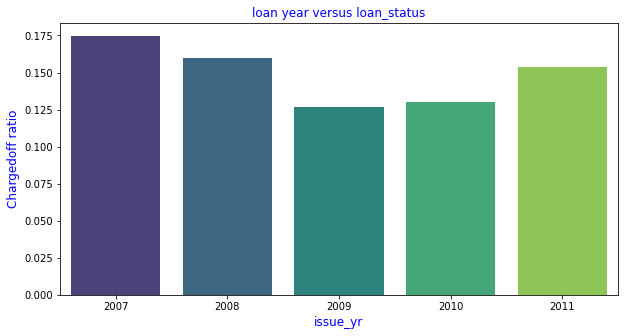

row_id,issue_yr,Charged Off,Current,Fully Paid,Total,Chargedoff_percent
0,2007,40,0,189,229,0.174672
1,2008,236,0,1239,1475,0.160000
4,2011,3110,1036,16063,20209,0.153892
3,2010,1413,0,9438,10851,0.130218
2,2009,560,0,3867,4427,0.126496


In [162]:
loan_status_comparison='issue_yr'
bivariate_box(df=loan,loan_status_comparison=loan_status_comparison,plot_title='loan year versus loan_status' ,width = 10,height = 5,rot = 0)


# observation: 2007 have more defaulters. 

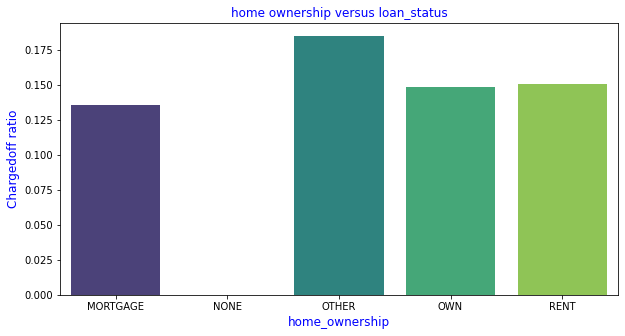

row_id,home_ownership,Charged Off,Current,Fully Paid,Total,Chargedoff_percent
2,OTHER,17,0,75,92,0.184783
4,RENT,2760,399,15157,18316,0.150688
3,OWN,431,77,2396,2904,0.148416
0,MORTGAGE,2151,560,13165,15876,0.135488
1,NONE,0,0,3,3,0.000000


In [163]:
loan_status_comparison='home_ownership'
bivariate_box(df=loan,loan_status_comparison=loan_status_comparison,plot_title='home ownership versus loan_status' ,width = 10,height = 5,rot = 0)


# observation:   

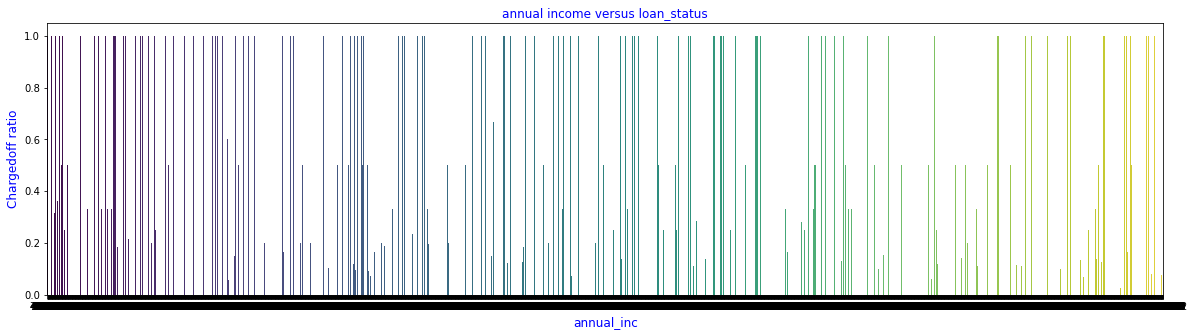

row_id,annual_inc,Charged Off,Current,Fully Paid,Total,Chargedoff_percent
1113,36720.00,1,0,0,1,1.0
3676,78644.00,1,0,0,1,1.0
4528,108901.00,1,0,0,1,1.0
396,24395.00,1,0,0,1,1.0
4527,108900.00,1,0,0,1,1.0
...,...,...,...,...,...,...
1880,47580.00,0,0,2,2,0.0
1881,47581.00,0,0,1,1,0.0
1882,47590.00,0,0,1,1,0.0
1883,47600.00,0,0,1,1,0.0


In [164]:
loan_status_comparison='annual_inc'
bivariate_box(df=loan,loan_status_comparison=loan_status_comparison,plot_title='annual income versus loan_status' ,width = 20,height = 5,rot = 0)


# observation:   